In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv("bike_datset_day.csv")

In [4]:
data.shape

(731, 16)

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,728.000000,731.000000,729.000000,730.000000,731.000000,729.000000,730.000000,730.000000,731.000000,731.000000,730.000000,731.000000
mean,366.000000,2.496580,0.501370,6.516484,0.028728,2.994513,0.684932,1.395349,0.495111,0.474784,0.628044,0.190486,848.176471,3659.308219,4504.348837
std,211.165812,1.110807,0.500341,3.454519,0.167155,2.006849,0.464862,0.544894,0.183219,0.162657,0.142469,0.077498,686.622488,1559.019285,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336667,0.338045,0.520521,0.134950,315.500000,2502.250000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.487364,0.627083,0.180975,713.000000,3664.500000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.608916,0.730313,0.233214,1096.000000,4783.250000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
data.dtypes

instant         int64
dteday         object
season          int64
yr            float64
mnth          float64
holiday         int64
weekday       float64
workingday    float64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered    float64
cnt             int64
dtype: object

In [7]:
data[data.isnull().any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5,6,06-01-2011,1,0.0,1.0,0,4.0,1.0,1,0.204348,0.233209,NaN,0.089565,88,1518.0,1606
11,12,12-01-2011,1,0.0,1.0,0,3.0,1.0,1,0.172727,NaN,0.599545,0.304627,25,1137.0,1162
13,14,14-01-2011,1,0.0,1.0,0,5.0,1.0,1,0.160870,0.188413,0.537826,0.126548,54,NaN,1421
18,19,19-01-2011,1,NaN,1.0,0,3.0,1.0,2,0.292174,0.298422,0.741739,0.208317,78,1572.0,1650
136,137,17-05-2011,2,0.0,5.0,0,2.0,1.0,2,NaN,0.538529,0.837917,0.277354,678,3445.0,4123
140,141,21-05-2011,2,0.0,5.0,0,6.0,NaN,1,0.602500,0.571975,0.626667,0.120650,2258,3547.0,5805
149,150,30-05-2011,2,0.0,NaN,1,1.0,0.0,1,0.733333,0.671092,0.685000,0.131225,1549,2549.0,4098
152,153,02-06-2011,2,0.0,NaN,0,NaN,1.0,1,0.715000,0.643942,0.305000,0.292287,736,4232.0,4968
264,265,22-09-2011,3,0.0,9.0,0,NaN,1.0,2,NaN,0.554963,0.902083,0.128125,555,4240.0,4795
325,326,22-11-2011,4,0.0,NaN,0,2.0,1.0,3,0.416667,0.421696,0.962500,0.118792,69,1538.0,1607


In [8]:
data[(data==0).any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654.0,985
1,2,02-01-2011,1,0.0,1.0,0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670.0,801
2,3,03-01-2011,1,0.0,1.0,0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229.0,1349
3,4,04-01-2011,1,0.0,1.0,0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454.0,1562
4,5,05-01-2011,1,0.0,1.0,0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1.0,12.0,0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867.0,2114
727,728,28-12-2012,1,1.0,12.0,0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451.0,3095
728,729,29-12-2012,1,1.0,12.0,0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182.0,1341
729,730,30-12-2012,1,1.0,12.0,0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432.0,1796


In [9]:
data.mean(numeric_only=True)


instant        366.000000
season           2.496580
yr               0.501370
mnth             6.516484
holiday          0.028728
weekday          2.994513
workingday       0.684932
weathersit       1.395349
temp             0.495111
atemp            0.474784
hum              0.628044
windspeed        0.190486
casual         848.176471
registered    3659.308219
cnt           4504.348837
dtype: float64

In [84]:
datareplaced1 = data[['instant', 'dteday','season' , 'yr' , 'mnth' , 'holiday' , 'weekday' , 'workingday' , 'weathersit']].fillna(data[['season' , 'yr' , 'mnth' , 'holiday' , 'weekday' , 'workingday' , 'weathersit']].mode(numeric_only=True).iloc[0])
datareplaced2 = data[['temp' , 'atemp' , 'hum' , 'windspeed' , 'casual' , 'registered' , 'cnt']].fillna(data[['temp' , 'atemp' , 'hum' , 'windspeed' , 'casual' , 'registered' , 'cnt']].mean(numeric_only=True))
datarep = pd.concat([datareplaced1 , datareplaced2] , axis = 1)
datarep.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

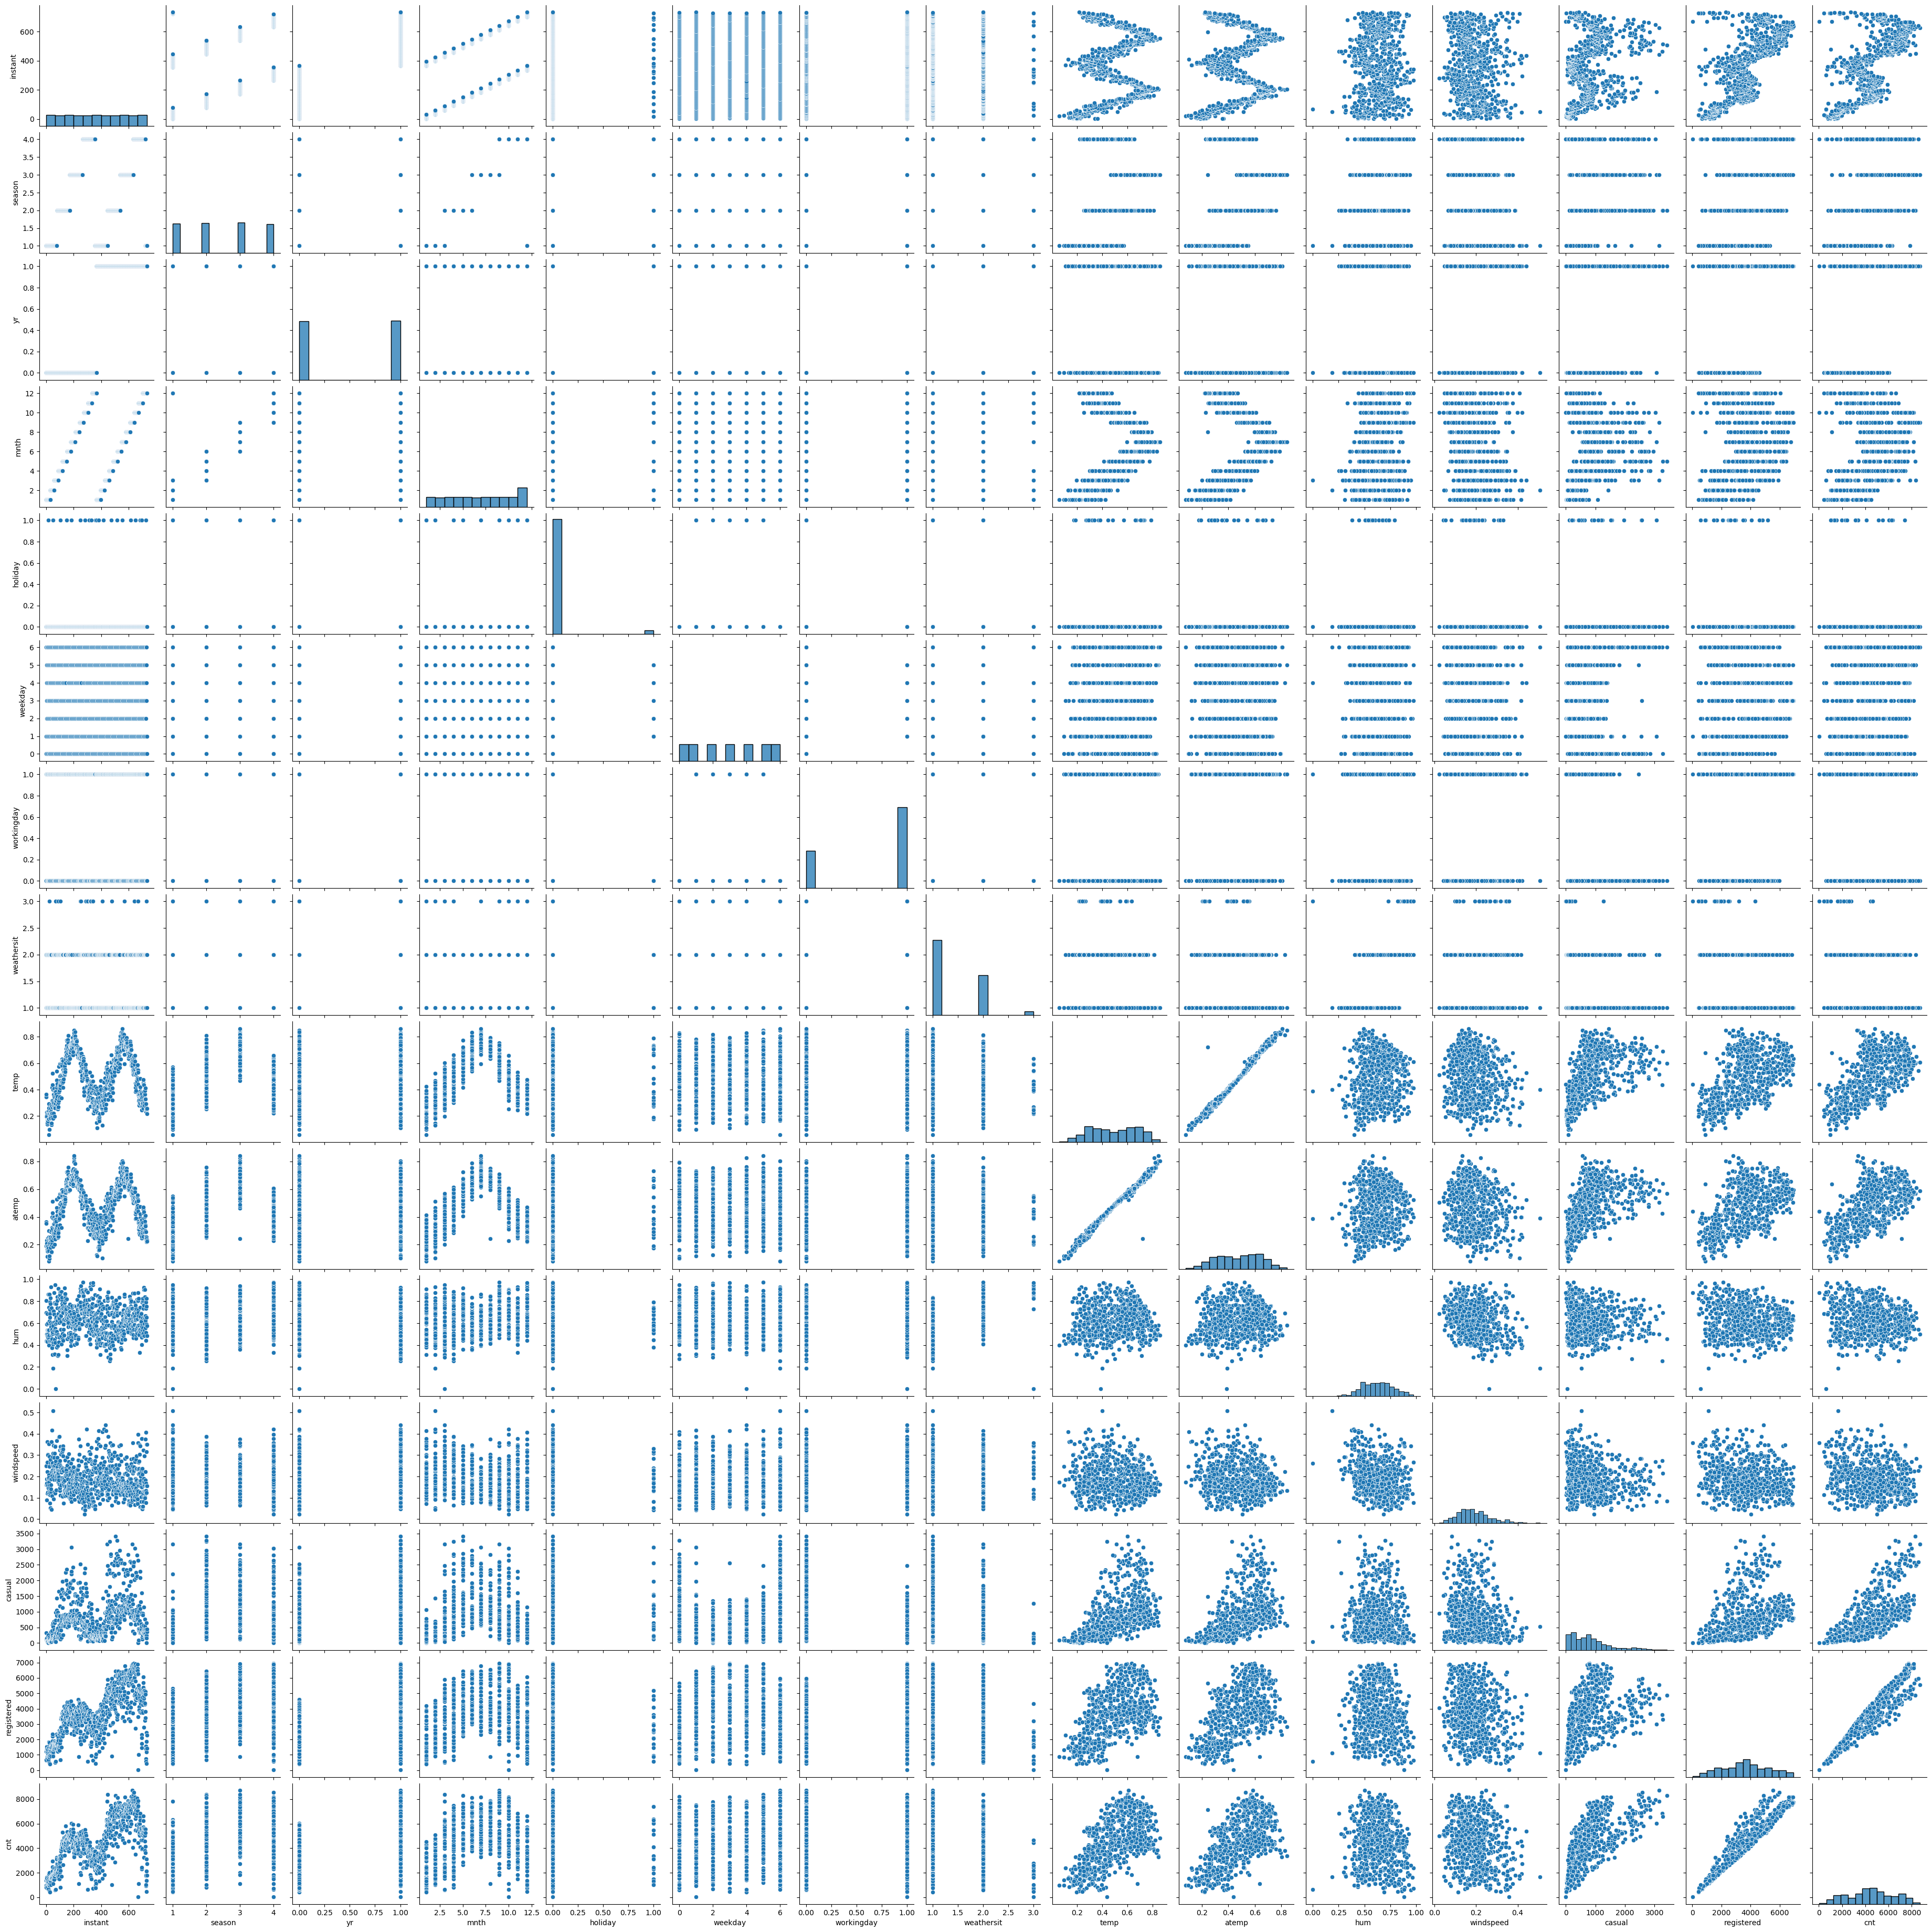

In [77]:
sns.pairplot(data)

In [85]:
datarep[:100]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654.0,985
1,2,02-01-2011,1,0.0,1.0,0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670.0,801
2,3,03-01-2011,1,0.0,1.0,0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229.0,1349
3,4,04-01-2011,1,0.0,1.0,0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454.0,1562
4,5,05-01-2011,1,0.0,1.0,0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,06-04-2011,2,0.0,4.0,0,3.0,1.0,1,0.390833,0.387608,0.470833,0.263063,413,2395.0,2808
96,97,07-04-2011,2,0.0,4.0,0,4.0,1.0,1,0.437500,0.433696,0.602917,0.162312,571,2570.0,3141
97,98,08-04-2011,2,0.0,4.0,0,5.0,1.0,2,0.335833,0.324479,0.836250,0.226992,172,1299.0,1471
98,99,09-04-2011,2,0.0,4.0,0,6.0,0.0,2,0.342500,0.341529,0.877500,0.133083,879,1576.0,2455


In [86]:
datarep[(datarep['mnth'] == 4) & (datarep['holiday'] == 1)][['temp', 'yr', 'atemp', 'mnth' , 'holiday']]

,temp,yr,atemp,mnth,holiday
104,0.446667,0.0,0.441913,4.0,1
471,0.664167,1.0,0.614925,4.0,1


In [87]:
datarep[(datarep['casual']> 140) & (datarep['registered']< 1000)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654.0,985
15,16,16-01-2011,1,0.0,1.0,0,0.0,0.0,1,0.231667,0.234217,0.483750,0.188433,251,953.0,1204
22,23,23-01-2011,1,0.0,1.0,0,0.0,0.0,1,0.096522,0.098839,0.436522,0.246600,150,836.0,986
51,52,21-02-2011,1,0.0,2.0,1,1.0,0.0,2,0.303333,0.284075,0.605000,0.307846,195,912.0,1107
238,239,27-08-2011,3,0.0,8.0,0,6.0,0.0,2,0.680000,0.635556,0.850000,0.375617,226,889.0,1115
327,328,24-11-2011,4,0.0,11.0,1,4.0,0.0,1,0.373333,0.372471,0.549167,0.167304,560,935.0,1495
357,358,24-12-2011,1,0.0,12.0,0,6.0,0.0,1,0.302500,0.299242,0.542500,0.190304,155,856.0,1011
358,359,25-12-2011,1,0.0,12.0,0,0.0,0.0,1,0.274783,0.279961,0.681304,0.155091,303,451.0,754
359,360,26-12-2011,1,0.0,12.0,1,1.0,0.0,1,0.321739,0.315535,0.506957,0.239465,430,887.0,1317
723,724,24-12-2012,1,1.0,12.0,0,1.0,1.0,2,0.231304,0.258900,0.791304,0.077230,174,746.0,920


In [88]:
datarep[(datarep['cnt'] > 981) & (datarep.index >= 10) & (datarep.index <= 150)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10,11,11-01-2011,1,0.0,1.0,0,2.0,1.0,2,0.169091,0.191464,0.686364,0.122132,43,1220.000000,1263
11,12,12-01-2011,1,0.0,1.0,0,3.0,1.0,1,0.172727,0.474784,0.599545,0.304627,25,1137.000000,1162
12,13,13-01-2011,1,0.0,1.0,0,4.0,1.0,1,0.165000,0.150883,0.470417,0.301000,38,1368.000000,1406
13,14,14-01-2011,1,0.0,1.0,0,5.0,1.0,1,0.160870,0.188413,0.537826,0.126548,54,3659.308219,1421
14,15,15-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.233333,0.248112,0.498750,0.157963,222,1026.000000,1248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,27-05-2011,2,0.0,5.0,0,5.0,1.0,1,0.681667,0.637008,0.653750,0.240679,871,3808.000000,4679
147,148,28-05-2011,2,0.0,5.0,0,6.0,0.0,1,0.655833,0.612379,0.729583,0.230092,2001,2757.000000,4758
148,149,29-05-2011,2,0.0,5.0,0,0.0,0.0,1,0.667500,0.615550,0.818750,0.213938,2355,2433.000000,4788
149,150,30-05-2011,2,0.0,1.0,1,1.0,0.0,1,0.733333,0.671092,0.685000,0.131225,1549,2549.000000,4098


In [90]:
labels = datarep['cnt']
features = datarep.drop(columns=['cnt'])

Feature_train, Feature_test, Label_train, Label_test = train_test_split(
    features,        
    labels,      
    test_size=0.25,  
)

In [92]:
Feature_train

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
224,225,13-08-2011,3,0.0,8.0,0,6.0,0.0,2,0.685833,0.645858,0.729583,0.211454,1504,2646.0
135,136,16-05-2011,2,0.0,5.0,0,1.0,1.0,1,0.577500,0.550512,0.787917,0.126871,773,3185.0
14,15,15-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.233333,0.248112,0.498750,0.157963,222,1026.0
211,212,31-07-2011,3,0.0,7.0,0,0.0,0.0,1,0.805833,0.729796,0.480833,0.164813,1524,2778.0
102,103,13-04-2011,2,0.0,4.0,0,3.0,1.0,2,0.412500,0.417283,0.819167,0.250617,209,1953.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,631,22-09-2012,3,1.0,9.0,0,6.0,0.0,1,0.650000,0.610488,0.646667,0.283583,2512,5883.0
65,66,07-03-2011,1,0.0,3.0,0,1.0,1.0,1,0.261739,0.238461,0.551304,0.341352,244,1628.0
89,90,31-03-2011,2,0.0,3.0,0,4.0,1.0,3,0.268333,0.257575,0.918333,0.217646,179,1506.0
23,24,24-01-2011,1,0.0,1.0,0,1.0,1.0,1,0.097391,0.117930,0.491739,0.158330,86,1330.0


In [91]:
Feature_test

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
3,4,04-01-2011,1,0.0,1.0,0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454.0
140,141,21-05-2011,2,0.0,5.0,0,6.0,1.0,1,0.602500,0.571975,0.626667,0.120650,2258,3547.0
380,381,16-01-2012,1,1.0,1.0,1,1.0,0.0,1,0.190000,0.190663,0.522500,0.231358,217,2081.0
62,63,04-03-2011,1,0.0,3.0,0,5.0,1.0,2,0.261667,0.255679,0.610417,0.203346,214,1730.0
682,683,13-11-2012,4,1.0,11.0,0,2.0,1.0,2,0.343333,0.323225,0.662917,0.342046,327,3767.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,711,11-12-2012,4,1.0,12.0,0,2.0,1.0,2,0.353333,0.338363,0.596667,0.296037,282,5219.0
576,577,30-07-2012,3,1.0,7.0,0,1.0,1.0,1,0.730833,0.684987,0.668750,0.153617,1040,6065.0
72,73,14-03-2011,1,0.0,3.0,0,1.0,1.0,1,0.325217,0.332000,0.496957,0.136926,359,1687.0
602,603,25-08-2012,3,1.0,8.0,0,6.0,0.0,2,0.661667,0.618696,0.712917,0.244408,1829,4224.0


In [93]:
Label_train

224    4150
135    3958
14     1248
211    4302
102    2162
       ... 
630    8395
65     1872
89     1685
23     1416
653    5875
Name: cnt, Length: 548, dtype: int64

In [94]:
Label_test

3      1562
140    5805
380    2298
62     1944
682    4094
       ... 
710    5501
576    7105
72     2046
602    6053
491    6359
Name: cnt, Length: 183, dtype: int64

label
02-06-2012       8120
05-10-2012       8156
06-10-2012       7965
09-09-2012       8227
11-09-2012       7767
12-09-2012       7870
13-09-2012       7804
14-09-2012       8009
15-09-2012       8714
17-03-2012       7836
18-08-2012       7865
19-05-2012       8294
20-10-2012       8090
21-09-2012       8167
22-09-2012       8395
23-03-2012       8362
23-09-2012       7907
25-07-2012       8173
27-10-2012       7852
29-09-2012       8555
Others        3130551
Name: cnt, dtype: int64

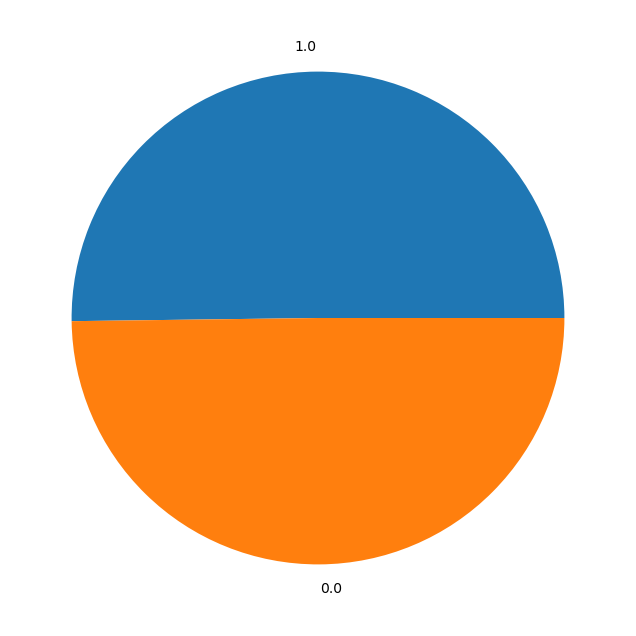

In [119]:
plt.figure(figsize=(8, 8)) 
year = datarep['yr'].value_counts()
plt.pie(year, labels=year.index)
plt.show()

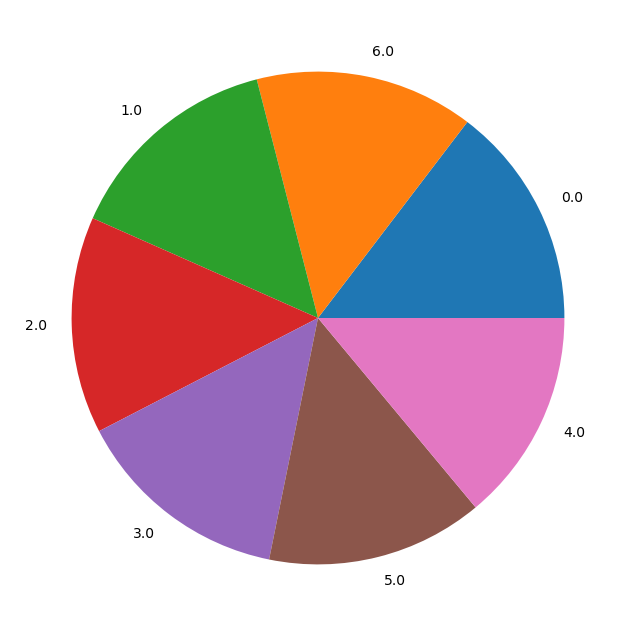

In [120]:
plt.figure(figsize=(8, 8)) 
year = datarep['weekday'].value_counts()
plt.pie(year, labels=year.index)
plt.show()